# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import pandas as pd 
import matplotlib.pyplot as plt

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
cmp = study_results.merge(mouse_metadata, on='Mouse ID').sort_values(['Timepoint','Tumor Volume (mm3)'])

# Display the data table for preview
cmp.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
cmp["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cmp[cmp.duplicated(["Mouse ID","Timepoint"])] ["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
cmp[cmp["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = cmp[cmp["Mouse ID"]!="g989"]
clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grp = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']

pd.DataFrame({
    'Mean Tumor Volume': grp.mean(),
    'Median Tumor Volume': grp.median(),
    'Tumor Volume Variance': grp.var(),
    'Tumor Volume Std. Dev.': grp.std(),
    'Tumor Volume Std. Err': grp.sem()
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean', 'median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
df_count = grp.size().sort_values(ascending=False)


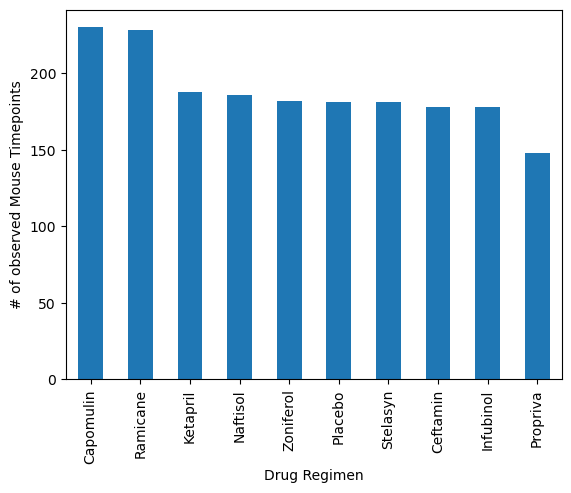

In [10]:
df_count.plot.bar(ylabel='# of observed Mouse Timepoints');

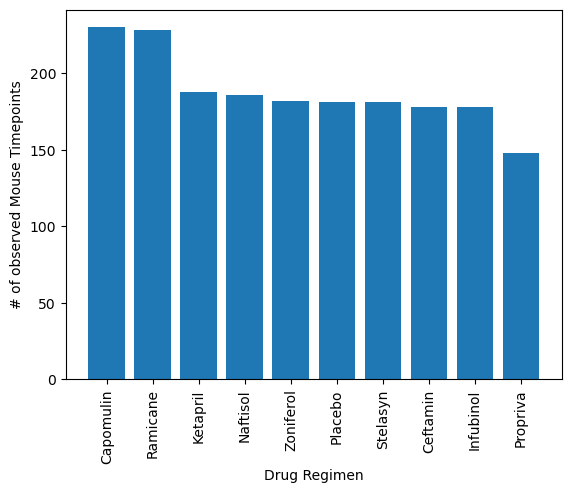

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(df_count.index, df_count)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")
plt.show()


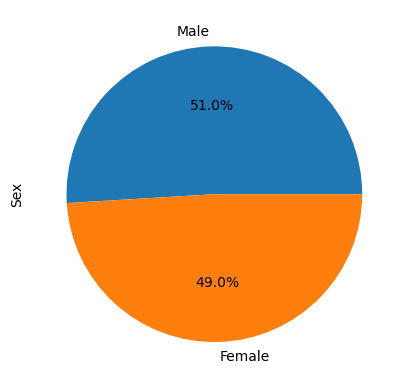

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
g_count = clean.Sex.value_counts()
g_count.plot.pie(ylabel='Sex',autopct='%.1f%%');

In [13]:
g_count.index

Index(['Male', 'Female'], dtype='object', name='Sex')

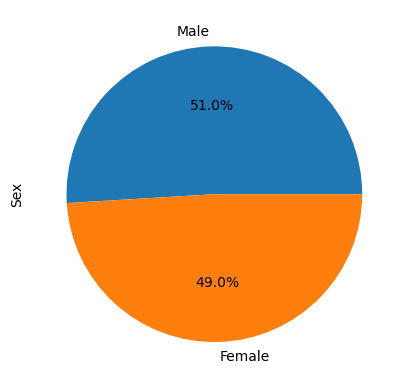

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(g_count,autopct="%.1f%%",labels=g_count.index)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_time = clean.groupby('Mouse ID').Timepoint.max().reset_index().merge(clean, on=['Mouse ID','Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor = max_time[max_time['Drug Regimen']==drug]['Tumor Volume (mm3)']
    
    # add subset 
    tumor_list.append(tumor)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = tumor.quantile(.75) - tumor.quantile(.25)
    lower = tumor.quantile(.25) - 1.5*iqr
    upper = tumor.quantile(.75) + 1.5*iqr

    # Determine outliers using upper and lower bounds
    print(f'Potential outlier for {drug}: {tumor[(tumor<lower)|(tumor>upper)]}')

Potential outlier for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outlier for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outlier for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


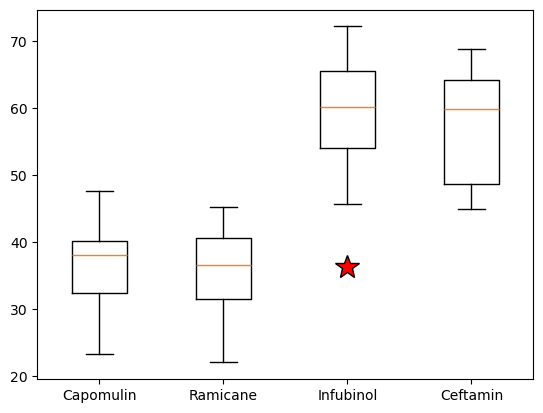

In [71]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list, labels=drugs, flierprops={'markerfacecolor':'red', 'marker':'*', 'markersize':18})
plt.show()

## Line and Scatter Plots

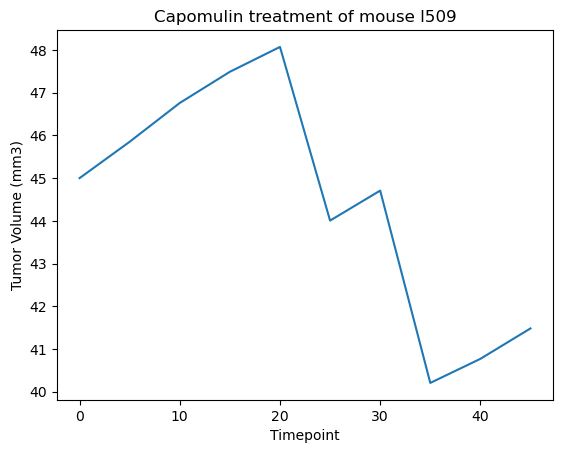

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean[clean['Mouse ID']=='l509'].plot(
    'Timepoint',
    'Tumor Volume (mm3)', 
    ylabel='Tumor Volume (mm3)', 
    legend=None,
    title='Capomulin treatment of mouse l509'
);

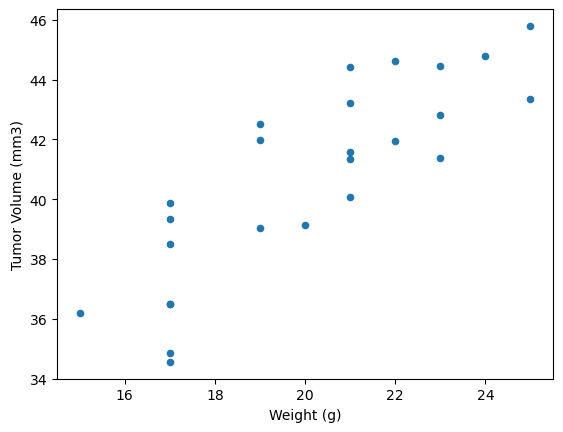

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_tumor = clean[clean['Drug Regimen']=='Capomulin'].groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
weight_tumor.plot.scatter('Weight (g)','Tumor Volume (mm3)');

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


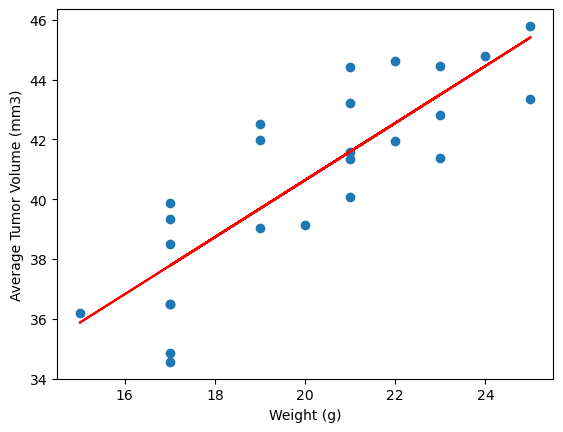

In [120]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x = weight_tumor['Weight (g)']
y = weight_tumor['Tumor Volume (mm3)']

lr = linregress(x, y)

print(f'The correlation between mouse weight and the average tumor volume is {lr.rvalue:.2f}')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x,y)
plt.plot(x, x*lr.slope+lr.intercept, color='r')
plt.show()